## **Exploratory analysis for Nigeria flooding study**

In [1]:
import sys; sys.path.append('/home/clair/WWA'); from wwa import *

warnings.filterwarnings("ignore", message = "__len__ for multi-part geometries is deprecated.+")         # warning about change to Shapely defaults

ERROR 1: PROJ: proj_create_from_database: Open of /home/clair/miniconda3/envs/wwa/share/proj failed


- maps of suggested study region (Niger-Benue basin) & most affected states
  
&nbsp;
- map & time series of 2022 JJAS anomaly with respect to 1985-2015 climatology

- Lagdo Dam was opened around September 20th - water released for 3 weeks

---
### **Maps of the study region**

In [92]:
# Niger-Benue catchment (originally didn't include the lvl4 area)
nb = pd.concat([gpd.read_file("hybas_af_lev01-12_v1c/lev03").to_crs(epsg = "4326").iloc[[15,16,17]],
                gpd.read_file("hybas_af_lev01-12_v1c/lev04").to_crs(epsg = "4326").iloc[[93]]]).dissolve()
nb.to_file("niger-benue-catchment")

# Lake Chad catchment
lc = gpd.read_file("hybas_af_lev01-12_v1c/lev03").to_crs(epsg = "4326").iloc[[39]]
lc.to_file("lake-chad-catchment")

#### **Niger-Benue catchment**

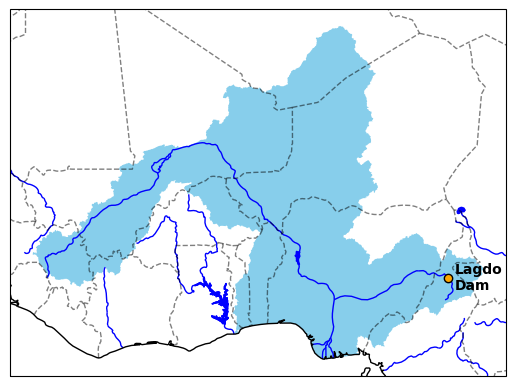

In [94]:
fig, ax = plt.subplots(subplot_kw = {"projection" : cartopy.crs.PlateCarree()})
gpd.read_file("niger-benue-catchment").plot(ax = ax, color = "skyblue")

ax.add_feature(cartopy.feature.RIVERS, color = "blue")
ax.add_feature(cartopy.feature.LAKES, color = "blue")
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")

ax.coastlines()

ax.plot(*get_latlon("Lagdo Dam").values(), marker = "o", mec = "k", color = "orange")
# ax.plot(*get_latlon("Lake Chad"), marker = "o", mec = "k")
# ax.plot(*get_latlon("Dasin Hausa"), marker = "o", mec = "k")   # location of unfinished dam

ax.annotate("Lagdo\nDam", xy = get_latlon("Lagdo Dam").values(), fontweight = "bold",
                 textcoords="offset points", # how to position the text
                 xytext=(5,-8), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.savefig("niger-benue_catchment.png")

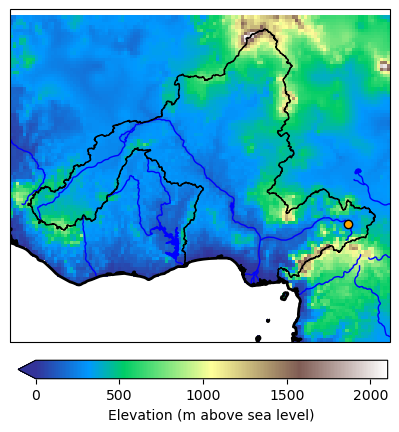

In [95]:
# elevations within Niger-Benue catchment
elev = xr.open_dataset("../90_data/elevation-0.25deg-global.nc").elev

# mask land surface
lsm = regionmask.mask_3D_geopandas(gpd.read_file("hybas_af_lev01-12_v1c/lev01"), elev.lon, elev.lat, drop = False).squeeze(drop = True)
elev = elev.where(lsm).dropna("lat", "all").dropna("lon", "all").sel(lat = slice(0,25), lon = slice(-13,17))

elev.plot(center = False, cmap = "terrain", subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, vmin = 0,
          cbar_kwargs = {"location" : "bottom", "fraction" : 0.05, "pad" : 0.05, "label" : "Elevation (m above sea level)"})
ax = plt.gcf().axes[0]
gpd.read_file("niger-benue-catchment").boundary.plot(ax = ax, color = "k", lw = 1)

ax.plot(*get_latlon("Lagdo Dam").values(), marker = "o", mec = "k", color = "orange")

ax.add_feature(cartopy.feature.RIVERS, color = "blue")
ax.add_feature(cartopy.feature.LAKES, color = "blue")

ax.set_extent((-13,17,0,25))

ax.coastlines(lw = 2)

plt.savefig("niger-benue_topography.png")

#### **Most affected states**

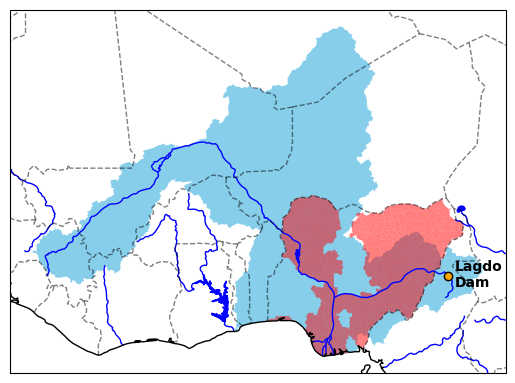

In [5]:
states = gpd.read_file("nigeria-lgas").to_crs(epsg = "4326")

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# most affected LGAs, per the trigger
aff = ["Teungo", "Gujba", "Geidam", "Gulani", "Fufore", "Song", "Potiskum", "Nguru", "Jakusko", "Monguno", "Nangere", "Karasuwa"]   

# also mentioned in news stories
aff2 = list(set(["Lokoja", "Kolokuma/Opokuma", "Bayelsa", "Anambra", "Delta", "Cross River", "Rivers", "Edo", "Ebonyi", "Imo", "Abia", "Lagos", 
                 "Yobe", "Borno", "Taraba", "Adamawa", "Kogi", "Niger", "Plateau", "Benue", "Bauchi", "Gombe", "Kano", "Jigawa", "Zamfara", "Kebbi", "Sokoto", "Federal Capital Territory",
                 "Maradi", "Zinder", "Tillaberi", "Tahoua"]))

# (https://www.thisdaylive.com/index.php/2022/10/17/nema-2-5-million-persons-affected-by-flooding/)
    # Bayelsa State Governor, Senator Douye Diri has urged the federal government to declare a national emergency
    # States like Anambra, Delta, Cross River, Rivers and Bayelsa are still at risk of experiencing floods up till the end of November 
    # The only road that links Opokuma and Sabagreia in Kolokuma/Opokuma Local Government Area and the only one also connecting Sagbama to Ekeremor that is still under construction has been broken

# (https://von.gov.ng/nigerias-delegation-to-meet-with-cameroun-over-impending-flood/)
    # the Metrological Agencies are warning that States like Anambra, Delta, Cross River, Rivers and Bayelsa are still at risk of experiencing floods up till the end of November.

# (https://humanglemedia.com/over-half-a-million-people-in-nigeria-affected-by-floods-this-year/)
    # A more comprehensive statement from a senior aide revealed that 508,721 people were affected by flooding across the country, 
    # with incidents recorded in the southern states of Edo, Delta, Ebonyi, Anambra, Imo, Abia, and the economic hub of Lagos. 
    # In the country’s north, flooding was recorded in Yobe, Borno, Taraba, Adamawa, Kogi, Niger, Plateau, Benue, Bauchi, Gombe, Kano, Jigawa, Zamfara, Kebbi, Sokoto, and the Federal Capital Territory. 

# (https://dailypost.ng/2022/09/15/over-300-people-killed-by-flood-in-nigeria-in-2022-alone-sci/)
    # since early July, intense rainfall has affected communities along the Niger-Nigeria border, triggering flooding which has washed away or damaged at least 14,900 homes
    # torrential rains are expected to continue in southern Niger and Northern Nigeria until the end of September
    # It noted that the flooding has also wreaked havoc in Niger’s Maradi, Zinder, Tillaberi and Tahoua regions, with more than 100,000 people affected in Niger alone.
    # SCI added that in Nigeria, flooding has also wreaked havoc in Borno, Yobe, and Adamawa States.
    
# (https://reliefweb.int/disaster/fl-2022-000271-nga)
    # Tounga, Fufore LGAs in Adamawa state and Gujba, Geidam, and Gulani LGA in Yobe state have been the most affected areas by the floods, according to partners’ rapid needs assessments
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# plot the catchment
fig, ax = plt.subplots(subplot_kw = {"projection" : cartopy.crs.PlateCarree()})
gpd.read_file("niger-benue-catchment").plot(ax = ax, color = "skyblue")

# add affected regions (darker colours were listed as more affected in the trigger)
# LGAs removed as all are also covered at state level 
# [states.loc[states.LGA == aff[i]].plot(ax = ax, color = matplotlib.cm.get_cmap('Oranges')(0.5 + i * 0.5/len(aff))) for i in range(len(aff))]     # listed in trigger (LGA level)
[states.loc[states.STATE == aff2[i]].plot(ax = ax, color = "red", alpha = 0.5) for i in range(len(aff2)) if aff2[i] in states.STATE.values]      # mentioned at state level
# [states.loc[states.LGA == aff2[i]].plot(ax = ax, color = "indigo") for i in range(len(aff2)) if aff2[i] in states.LGA.values]                  # mentioned at LGA level

ax.add_feature(cartopy.feature.RIVERS, color = "blue")
ax.add_feature(cartopy.feature.LAKES, color = "blue")
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
ax.coastlines()

ax.plot(*get_latlon("Lagdo Dam").values(), marker = "o", mec = "k", color = "orange")
ax.annotate("Lagdo\nDam", xy = get_latlon("Lagdo Dam").values(), fontweight = "bold",
                 textcoords="offset points", # how to position the text
                 xytext=(5,-8), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.savefig("niger-benue_catchment-with-affected-areas.png")

#### **Affected area with secondary catchment**

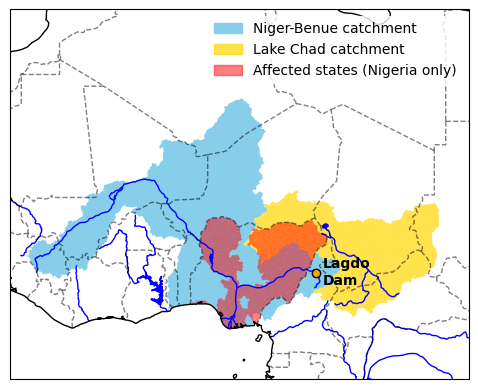

In [22]:
fig, ax = plt.subplots(subplot_kw = {"projection" : cartopy.crs.PlateCarree()})
gpd.read_file("niger-benue-catchment").plot(ax = ax, color = "skyblue")
gpd.read_file("lake-chad-catchment").plot(ax = ax, color = "gold", alpha = 0.7)

[states.loc[states.STATE == aff2[i]].plot(ax = ax, color = "red", alpha = 0.5) for i in range(len(aff2)) if aff2[i] in states.STATE.values]      # mentioned at state level

ax.add_feature(cartopy.feature.RIVERS, color = "blue")
ax.add_feature(cartopy.feature.LAKES, color = "blue")
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
ax.coastlines()
ax.set_extent((-13,27,0,30))

ax.plot(*get_latlon("Lagdo Dam").values(), marker = "o", mec = "k", color = "orange")
ax.annotate("Lagdo\nDam", xy = get_latlon("Lagdo Dam").values(), fontweight = "bold", textcoords="offset points", xytext=(5,-8), ha='left')

plt.legend(handles = [matplotlib.patches.Patch(color = l["color"], alpha = l["alpha"], label= l["label"]) for l in [{"label" : "Niger-Benue catchment", "color" : "skyblue", "alpha" : 1},
                                                                                                                    {"label" : "Lake Chad catchment", "color" : "gold", "alpha" : 0.7},
                                                                                                                    {"label" : "Affected states (Nigeria only)", "color" : "red", "alpha" : 0.5}]],
           edgecolor = "w")

plt.savefig("niger-benue-chad_catchment-with-affected-areas.png")

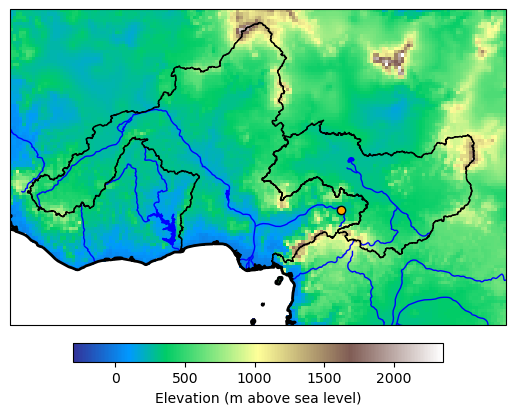

In [31]:
# elevations within Niger-Benue catchment
elev = xr.open_dataset("../90_data/elevation-0.25deg-global.nc").elev

# mask land surface
lsm = regionmask.mask_3D_geopandas(gpd.read_file("hybas_af_lev01-12_v1c/lev01"), elev.lon, elev.lat, drop = False).squeeze(drop = True)
elev = elev.where(lsm).dropna("lat", "all").dropna("lon", "all").sel(lat = slice(0,25), lon = slice(-13,27))

elev.plot(center = False, cmap = "terrain", subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, 
          cbar_kwargs = {"location" : "bottom", "fraction" : 0.05, "pad" : 0.05, "label" : "Elevation (m above sea level)"})
ax = plt.gcf().axes[0]
# gpd.read_file("hybas_af_lev01-12_v1c/lev03").iloc[[15,16,17]].dissolve().to_crs(epsg = "4326").boundary.plot(ax = ax, color = "k", lw = 1, ls = "--")
gpd.read_file("niger-benue-catchment").boundary.plot(ax = ax, color = "k", lw = 1)
gpd.read_file("lake-chad-catchment").boundary.plot(ax = ax, color = "k", lw = 1)

ax.plot(*get_latlon("Lagdo Dam").values(), marker = "o", mec = "k", color = "orange")

ax.add_feature(cartopy.feature.RIVERS, color = "blue")
ax.add_feature(cartopy.feature.LAKES, color = "blue")

ax.coastlines(lw = 2)

# plt.legend(handles = [matplotlib.lines.Line2D([], [], color='k', ls = ls, label = l) for ls, l in zip(["-", "--",], ["New boundary", "Original boundary"])], edgecolor = "w")

plt.savefig("niger-benue-chad_topography.png")

---
### **2022 JJA/JJAS anomalies**
- JJA or JJAS?

In [24]:
# get JJA seasonal precip
pr_jja =  xr.open_dataset("chirps-nigerbenue-monthly.nc").precip.sel(latitude = slice(0,25), longitude = slice(-13,27)).groupby("time.season")["JJA"].resample(time = "AS").mean()

pr_jja_clim = pr_jja.sel(time = slice("1985", "2015")).mean("time")
pr_jja_anom = pr_jja.sel(time = "2022") - pr_jja_clim
pr_jja_rel = pr_jja_anom / pr_jja_clim * 100

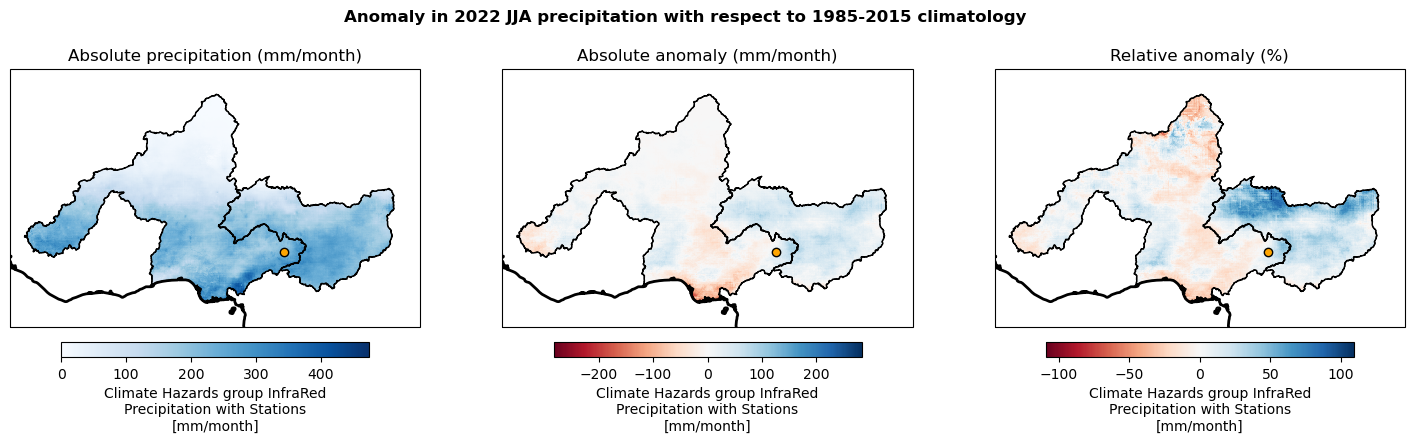

In [30]:
# plot JJA precip & anomaly
sf = pd.concat([gpd.read_file("niger-benue-catchment"), gpd.read_file("lake-chad-catchment")])
rm = regionmask.mask_3D_geopandas(sf.dissolve(), pr_jja_anom.longitude, pr_jja_anom.latitude, drop = False).squeeze(drop = True)

fig, axs = plt.subplots(ncols = 3, subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, figsize = (18,4), dpi = 100)

kw = {"cbar_kwargs" : {"location" : "bottom", "fraction" : 0.05, "pad" : 0.05}}

pr_jja.sel(time = "2022").where(rm == 1).plot(ax = axs[0], cmap = "Blues", **kw); axs[0].set_title("Absolute precipitation (mm/month)")
pr_jja_anom.where(rm == 1).plot(ax = axs[1], cmap = "RdBu", **kw); axs[1].set_title("Absolute anomaly (mm/month)")
pr_jja_rel.where(rm == 1).plot(ax = axs[2], cmap = "RdBu", **kw); axs[2].set_title("Relative anomaly (%)")

for ax in axs: 
    sf.boundary.plot(ax = ax, lw = 1, color = "k")
    ax.plot(*get_latlon("Lagdo Dam").values(), marker = "o", mec = "k", color = "orange")
    ax.set_extent((-13,27,2,25))
    ax.coastlines(lw = 2)
    
fig.suptitle("Anomaly in 2022 JJA precipitation with respect to 1985-2015 climatology", fontweight = "bold")

plt.savefig("niger-benue-chad_jja2022-precipitation.png")

In [2]:
# get JJAS seasonal precip
pr_jjas =  xr.open_dataset("chirps-nigerbenue-monthly.nc").precip.sel(latitude = slice(0,25), longitude = slice(-13,27))
pr_jjas = pr_jjas.sel(time = [t.dt.month in [6,7,8,9] for t in pr_jjas.time]).resample(time = "AS").mean()

pr_jjas_clim = pr_jjas.sel(time = slice("1985", "2015")).mean("time")
pr_jjas_anom = pr_jjas.sel(time = "2022") - pr_jjas_clim
pr_jjas_rel = pr_jjas_anom / pr_jjas_clim * 100

Text(0.5, 0.98, 'Anomaly in 2022 JJAS precipitation with respect to 1985-2015 climatology')

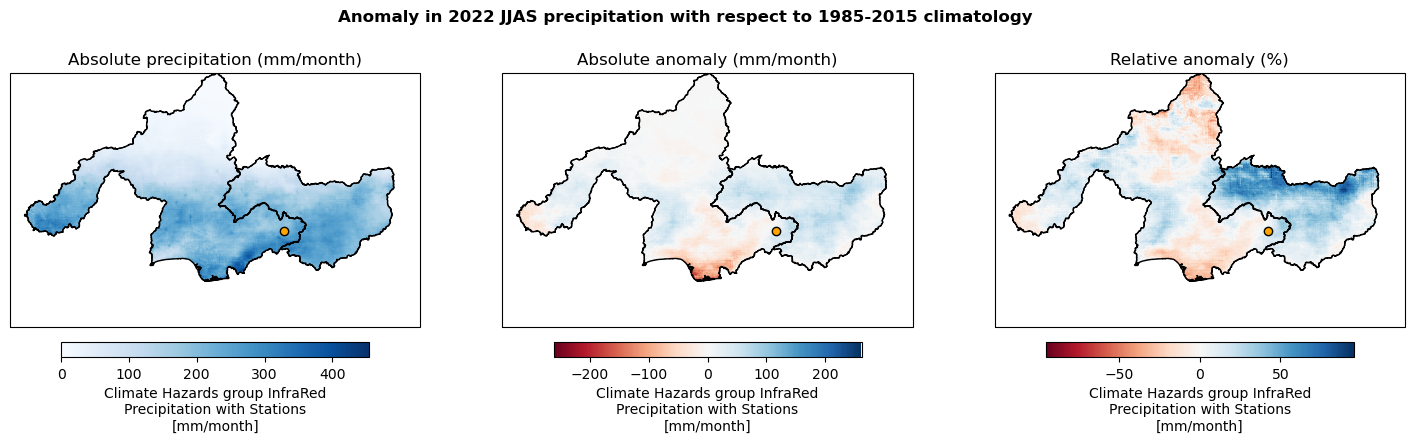

In [3]:
# plot JJA precip & anomaly
sf = pd.concat([gpd.read_file("niger-benue-catchment"), gpd.read_file("lake-chad-catchment")])
rm = regionmask.mask_3D_geopandas(sf.dissolve(), pr_jjas_anom.longitude, pr_jjas_anom.latitude, drop = False).squeeze(drop = True)

fig, axs = plt.subplots(ncols = 3, subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, figsize = (18,4), dpi = 100)

kw = {"cbar_kwargs" : {"location" : "bottom", "fraction" : 0.05, "pad" : 0.05}}

pr_jjas.sel(time = "2022").where(rm == 1).plot(ax = axs[0], cmap = "Blues", **kw); axs[0].set_title("Absolute precipitation (mm/month)")
pr_jjas_anom.where(rm == 1).plot(ax = axs[1], cmap = "RdBu", **kw); axs[1].set_title("Absolute anomaly (mm/month)")
pr_jjas_rel.where(rm == 1).plot(ax = axs[2], cmap = "RdBu", **kw); axs[2].set_title("Relative anomaly (%)")

for ax in axs: 
    sf.boundary.plot(ax = ax, lw = 1, color = "k")
    ax.plot(*get_latlon("Lagdo Dam").values(), marker = "o", mec = "k", color = "orange")
    
fig.suptitle("Anomaly in 2022 JJAS precipitation with respect to 1985-2015 climatology", fontweight = "bold")

---
### **Maps of monthly mean precipitation**

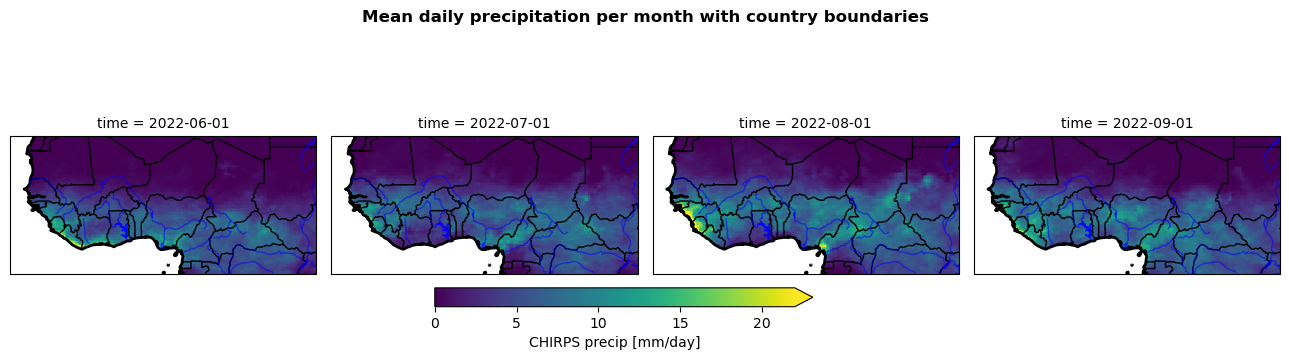

In [30]:
pr.resample(time = "MS").mean().plot(col = "time", subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                                     cbar_kwargs = {"location" : "bottom", "fraction" : 0.07, "pad" : 0.05}, cmap = "viridis", vmax = 22)

# coastlines and country borders
for ax in plt.gcf().axes[:4]:
    
    ax.coastlines(lw = 2)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.RIVERS, color = "blue", alpha = 0.5)
    ax.add_feature(cartopy.feature.LAKES, color = "blue", alpha = 0.5)
    
plt.suptitle("Mean daily precipitation per month with country boundaries", y = 1.04, fontweight = "bold")

plt.savefig("JJAS-precip-with-countries.png")

In [31]:
for l in [2,3,4]:
    
    pr.resample(time = "MS").mean().plot(col = "time", subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                                     cbar_kwargs = {"location" : "bottom", "fraction" : 0.07, "pad" : 0.05}, cmap = "viridis", vmax = 22)
    
    sf = gpd.read_file("hybas_af_lev01-12_v1c/lev0"+str(l)).to_crs(cartopy.crs.PlateCarree())
    
    # rivers and river basins
    for ax in plt.gcf().axes[:4]:
        
        sf.boundary.plot(ax = ax, color = "k", lw = 0.5)
        ax.add_feature(cartopy.feature.RIVERS, color = "blue", alpha = 0.5)
        ax.add_feature(cartopy.feature.LAKES, color = "blue", alpha = 0.5)
        
        ax.set_extent(subregion["lon"] + subregion["lat"])
        
    plt.suptitle("Mean daily precipitation per month with 'level "+str(l)+"' river basins", y = 1.06, fontweight = "bold")
    plt.savefig("JJAS-precip-with-lvl"+str(l)+"-river-basins.png"); plt.close()

---
### **Identify region of interest**

In [118]:
# load shapefile
sf = gpd.read_file("hybas_af_lev01-12_v1c/lev03").to_crs(cartopy.crs.PlateCarree())

# load precip data (just one day, to build the regionmask)
pr =  xr.open_dataset("../01_chirps/chirps-daily-p25.nc").isel(time = 0).sel(longitude = slice(-20,33), latitude = slice(0,24)).precip.load()

# make a regionmask for the individual regions
rm = regionmask.mask_3D_geopandas(sf, pr.longitude, pr.latitude, drop = False)

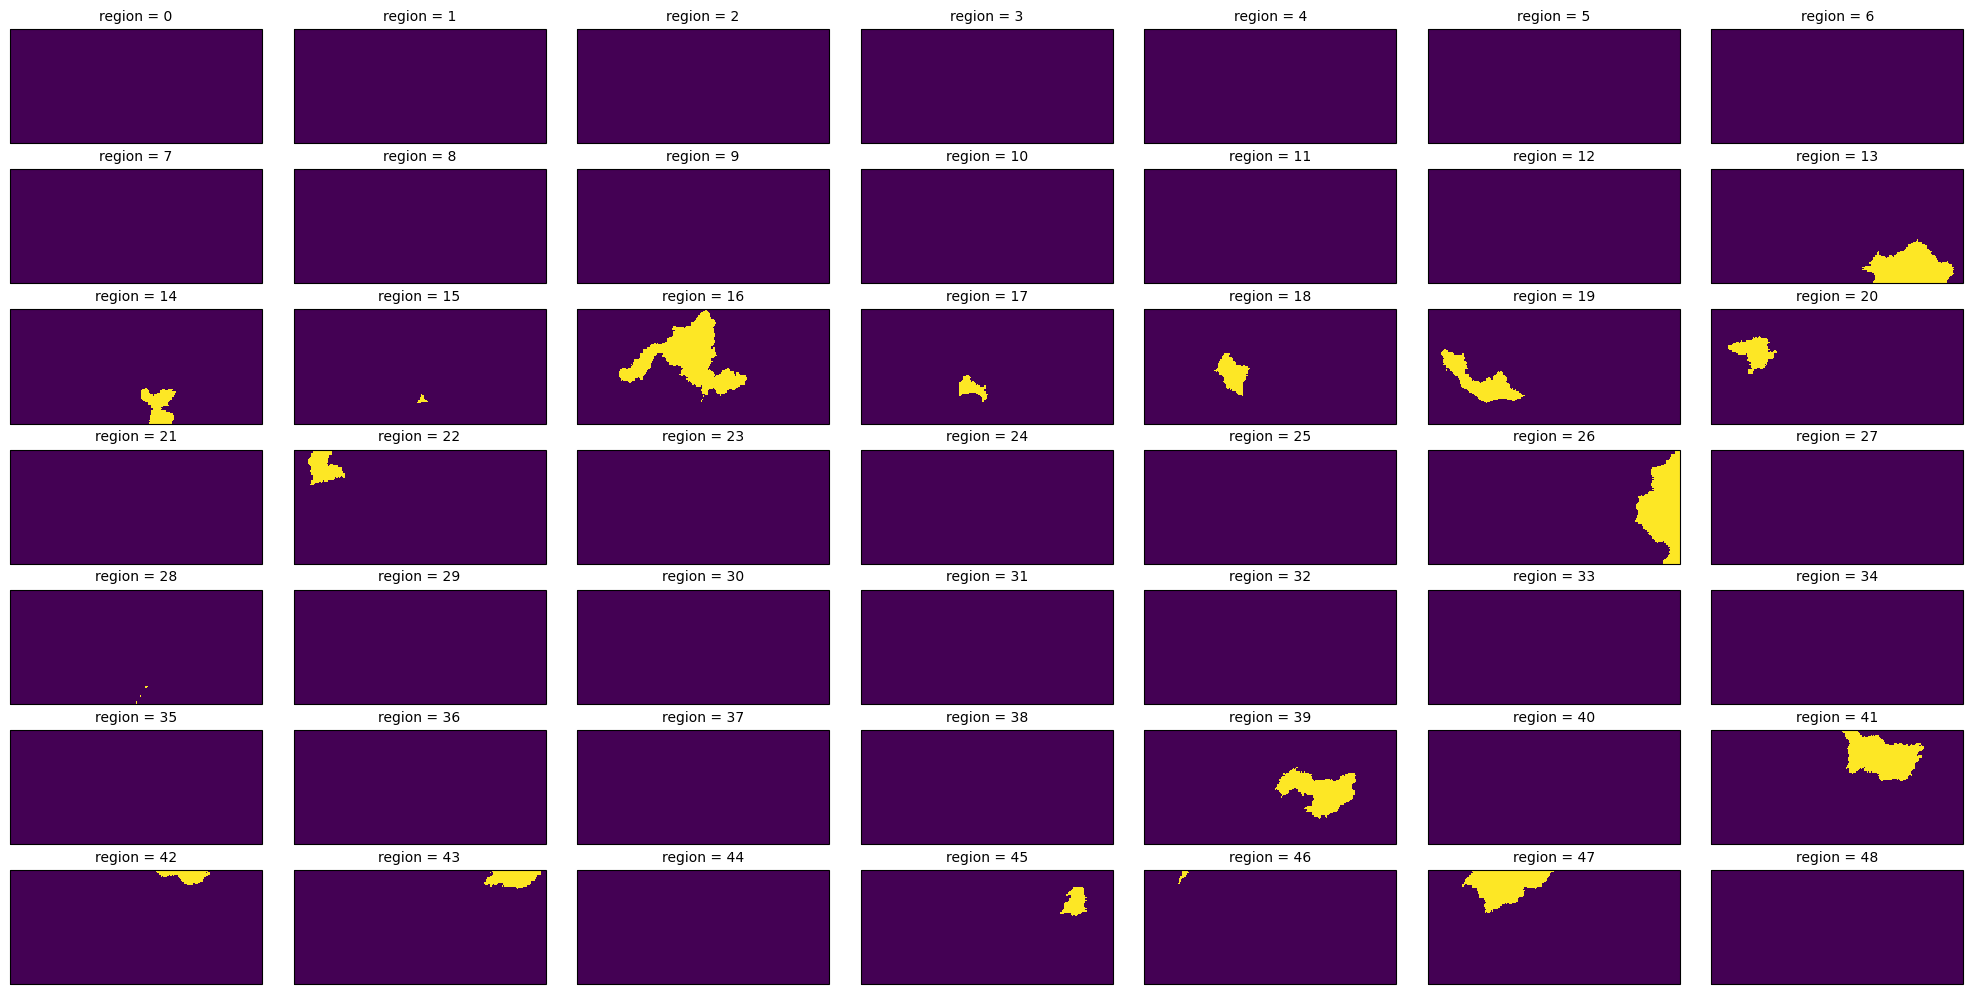

In [95]:
# quick plot of the individual basins (most of which don't even intersect with the area of interest)
rm.plot(col = "region", col_wrap = 7, subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, add_colorbar = False, figsize = (20,10))

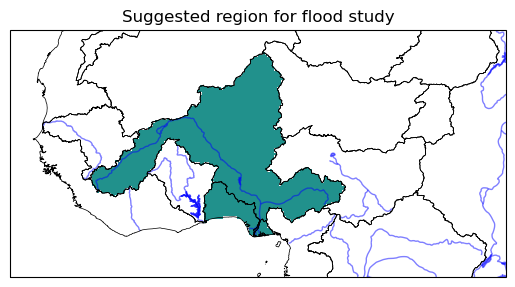

In [96]:
# select the regions that look most relevant & plot with surrounding borders & rivers
rm.where(rm).sel(region = slice(15,17)).mean("region").plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, add_colorbar = False)

ax = plt.gcf().axes[0]
sf.boundary.plot(ax = ax, color = "k", lw = 0.5)
ax.set_extent((-20,33,0,24))
ax.add_feature(cartopy.feature.RIVERS, color = "blue", alpha = 0.5)
ax.add_feature(cartopy.feature.LAKES, color = "blue", alpha = 0.5)

ax.set_title("Suggested region for flood study")
plt.savefig("Nigeria_flooding_catchment.png")

In [139]:
# extract selected region as a single shapefile, save for future reference
sf_flood = sf.iloc[slice(15,18)].dissolve().to_crs(epsg = "4326")
sf_flood.to_file("nigeria-flood-region")

---
### **Time series in selected catchment**

In [2]:
# load chirps, select single year for a subregion over N/C Africa to speed things up
subregion = {"lat" : [0,24], "lon" : [-20,33]}
pr =  xr.open_dataset("../01_chirps/chirps-daily-p25.nc").sel(longitude = slice(subregion["lon"][0], subregion["lon"][1]),
                                                              latitude = slice(subregion["lat"][0], subregion["lat"][1])).precip.load()

pr = pr.assign_attrs(long_name = "CHIRPS precip") # for colourbar

In [3]:
# load shapefile & create regionmask
sf_flood = gpd.read_file("nigeria-flood-region")
rm = regionmask.mask_3D_geopandas(sf_flood, pr.longitude, pr.latitude, drop = False).squeeze(drop = True)

In [4]:
ts = pr.where(rm).mean(["latitude", "longitude"])
ts.to_netcdf("chirps-daily-basinmean.nc")

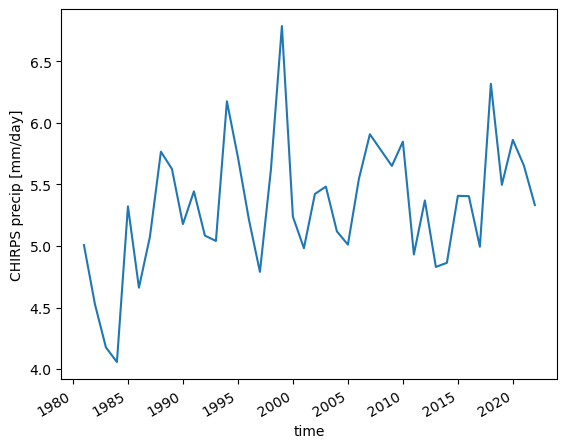

In [16]:
pr_max = ts.rolling(time = 60).mean().resample(time = "AS").max()
pr_max.plot()

plt.savefig("annual-maxima-of-60day-rolling-mean-precip.png")

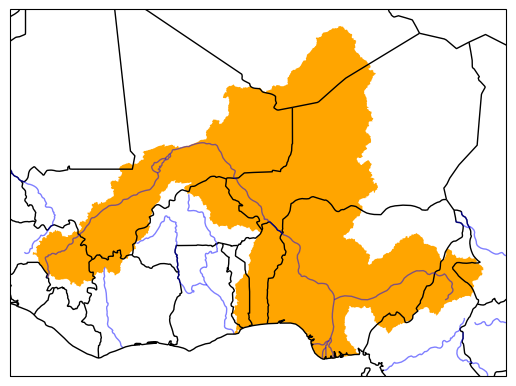

In [6]:
fig, ax = plt.subplots(subplot_kw = { "projection" : cartopy.crs.PlateCarree()})
sf_flood.plot(ax = ax, color = "orange")

ax.add_feature(cartopy.feature.BORDERS, color = "k")
ax.add_feature(cartopy.feature.RIVERS, color = "blue", alpha = 0.5)

ax.coastlines()

In [7]:
def cx_csv(da, fnm = None, dataset = None):
    
    # write CSV for easy import into Climate Explorer
    
    rnm = da.run.values[0]
    da = da.squeeze(drop = True)
    fnm_string = da.name+"_"+re.sub(" ", "_", rnm)
    
    if dataset is not None:
        fnm_string = dataset+"_"+fnm_string
        
    if fnm is None:
        fnm = "ts/"+fnm_string
    
    if "time" in da.dims:
        da = da.assign_coords(time = da.time.dt.year).rename(time = "#time")
    elif "year" in da.dims:
        da = da.rename(year = "#time")
    else:
        print(da.dims)
        return

    # write to csv
    fnm = re.sub(".txt", "", fnm)+".txt"
    da.to_dataframe().to_csv(fnm, sep = " ")
    
    # add a text string specifying the units (don't think format is correct here)
    if "units" in da.attrs:
        unit_string = "# "+da.name+" ["+da.units+"]"
        unit_string = "# variable ["+da.units+"]"
        ! echo "$unit_string" >> $fnm
    
    # add a line specifying the model & variable name, to be used as filename when uploading
    fnm_string = "# "+fnm_string
    ! echo "$fnm_string" >> $fnm

In [15]:
pr_max.assign_coords(time = pr_max.time.dt.year).rename(time = "#year").to_dataframe().to_csv("60daymaxprecip_basinmean.txt", sep = " ")

### **Standardised precipitation index**

In [8]:
import sys; sys.path.append('/home/clair/WWA'); from wwa import *
from xclim.indices.stats import fit
from scipy.stats import gamma, norm

import warnings
warnings.filterwarnings("ignore", message = "facecolor will have no effect.+")

In [22]:
# load monthly chirps data (already subsetted on Imperial servers)
pr = xr.open_dataset("chirps-nigeriaflooding-monthly.nc").precip.assign_attrs(long_name = "CHIRPS precip")

In [23]:
# # load shapefile & create hi-res regionmask for use with monthly data (only needs to be done once)
# sf_flood = gpd.read_file("nigeria-flood-region")
# rm = regionmask.mask_3D_geopandas(sf_flood, pr.longitude, pr.latitude, drop = False).squeeze(drop = True)
# rm.to_netcdf("regionmask-basin3-hires.nc")
rm = xr.open_dataset("regionmask-basin3-hires.nc").mask

In [83]:
# use inbuilt regionmask to get regionmask for Nigeria alone
gdf = regionmask.defined_regions.natural_earth_v5_0_0.countries_50.to_geodataframe()
rm_nigeria = regionmask.mask_3D_geopandas(gdf.loc[gdf.names == "Nigeria"], pr.longitude, pr.latitude, drop = False).squeeze(drop = True)

/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/pygeos/io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


In [100]:
pr_nigeria = pr.where(rm_nigeria).dropna("latitude", "all").dropna("longitude", "all")

In [85]:
def get_spi(da, start_cal = "1985", end_cal = "2015", min_precip = 30):
    
    spi = []
    for i in range(12):
        
        pr_m = da.groupby("time.month")[i+1]
        
        pr_cal = pr_m.sel(time = slice(start_cal, end_cal)).copy()
        pr_cal = pr_cal.where((pr_cal >= 1).sum("time") >= min_precip)    # only include cells where monthly precipitation > 1mm for at least [min_precip] of the available years (removes arid regions)
        
        pars = fit(pr_cal.dropna("time", "all"), dist = "gamma", method = "PWM")     # use xclim to do the fitting: produces a map of the parameters. Use PWM as more robust & faster
        
        spi_m = xr.apply_ufunc(lambda pr, dparams : norm.ppf(gamma.cdf(pr, *dparams)), pr_m, pars, 
                               input_core_dims = [["time"],["dparams"]], output_core_dims = [["time"]], vectorize = True).assign_coords(time = pr_m.time)
        spi.append(spi_m)
    
    spi = xr.concat(spi, "time").sortby("time").rename("spi")
    return spi

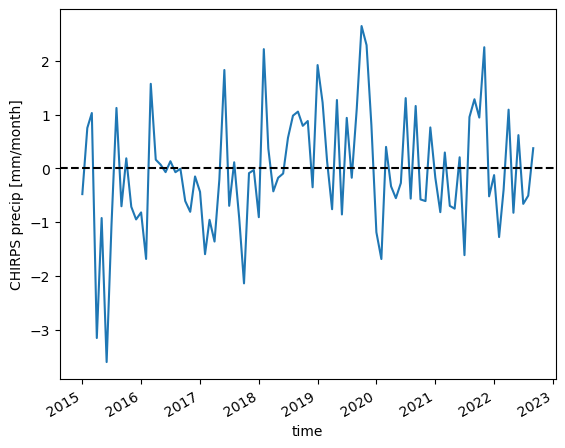

In [102]:
spi1_nigeria_ts = get_spi(pr_nigeria.mean(["latitude", "longitude"]))

spi1_nigeria_ts.sel(time = slice("2015", None)).plot()
plt.axhline(0, ls = "--", color = "k")

(array([1., 0., 0., 2., 4., 3., 4., 6., 8., 3.]),
 array([111.645134, 119.88419 , 128.12325 , 136.3623  , 144.60136 ,
        152.84042 , 161.07948 , 169.31853 , 177.55759 , 185.79665 ,
        194.0357  ], dtype=float32),
 <BarContainer object of 10 artists>)

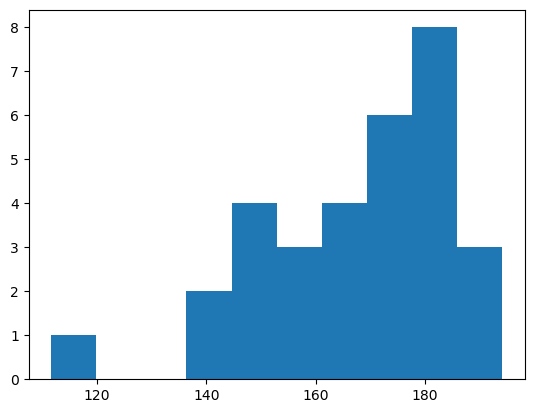

In [108]:
# is a gamma distribution even the right fit?

plt.hist(pr_nigeria.mean(["latitude", "longitude"]).sel(time = slice("1985", "2015")).groupby("time.month")[6])

In [ ]:
spi1_nigeria = get_spi(pr_nigeria)

In [120]:
nigeria_clim = pr_nigeria.sel(time = slice("1985", "2015")).groupby("time.month").mean()
nigeria_anom = (pr_nigeria.groupby("time.month") - nigeria_clim).groupby("time.month") / nigeria_clim * 100

In [126]:
nigeria_anom.sel(time = slice("2022-05", None)).plot(col = "time", cmap = "RdBu")

Text(0.5, 1.0, '')

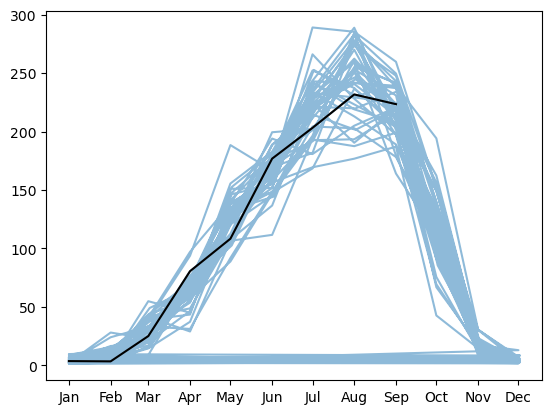

In [155]:
plt.plot(pr_nigeria.time.dt.dayofyear, pr_nigeria.mean(["latitude", "longitude"]), alpha = 0.5)
plt.plot(pr_nigeria.sel(time = "2022").time.dt.dayofyear, pr_nigeria.mean(["latitude", "longitude"]).sel(time = "2022"), color = "k")

plt.xticks(ticks = pr_nigeria.sel(time = "2018").time.dt.dayofyear.values, labels = pr_nigeria.sel(time = "2018").time.values)
import matplotlib.dates as mdates; plt.gcf().axes[0].xaxis.set_major_formatter(mdates.DateFormatter("%b"))

plt.title("")

In [11]:
# monthly climatology
pr_clim = pr.sel(time = slice("1985", "2015")).groupby("time.month").mean()

/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/pygeos/io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


In [4]:
pr_anom_abs = pr.groupby("time.month") - pr_clim

In [24]:
pr_anom_rel = pr_anom_abs.sel(time = slice("2022-04", None)).groupby("time.month") / pr_clim

#### **SPI of aggregated precipitation**

In [ ]:
# average precip over proposed study region
pr1 = pr.where(rm == 1).mean(["latitude", "longitude"])

spi = []
for i in range(12):
    
    pr_m = pr1.groupby("time.month")[i+1]
    
    pr_cal = pr_m.sel(time = slice("1985", "2015")).copy()
    pr_cal = pr_cal.where((pr_cal >= 1).sum("time") >= 30)    # only include cells where monthly precipitation > 1mm for at least 30 of the available years (removes arid regions)
    
    pars = fit(pr_cal.dropna("time", "all"), dist = "gamma", method = "PWM")     # use xclim to do the fitting: produces a map of the parameters. Use PWM as more robust & faster
    
    spi_m = xr.apply_ufunc(lambda pr, dparams : norm.ppf(gamma.cdf(pr, *dparams)), pr_m, pars, 
                                    input_core_dims = [["time"],["dparams"]], output_core_dims = [["time"]], vectorize = True).assign_coords(time = pr_m.time)
    spi.append(spi_m)
spi = xr.concat(spi, "time").sortby("time").rename("spi")

In [55]:
# what about 4-month average precip?
pr4 = pr.rolling(time = 4, center = False).mean().where(rm == 1).mean(["latitude", "longitude"])

spi4 = []
for i in range(12):
    
    pr_m = pr4.groupby("time.month")[i+1]
    
    pr_cal = pr_m.sel(time = slice("1985", "2015")).copy()
    pr_cal = pr_cal.where((pr_cal >= 1).sum("time") >= 30)    # only include cells where monthly precipitation > 1mm for at least 30 of the available years (removes arid regions)
    
    pars = fit(pr_cal.dropna("time", "all"), dist = "gamma", method = "PWM")     # use xclim to do the fitting: produces a map of the parameters. Use PWM as more robust & faster
    
    spi_m = xr.apply_ufunc(lambda pr, dparams : norm.ppf(gamma.cdf(pr, *dparams)), pr_m, pars, 
                                    input_core_dims = [["time"],["dparams"]], output_core_dims = [["time"]], vectorize = True).assign_coords(time = pr_m.time)
    spi4.append(spi_m)
    
spi4 = xr.concat(spi4, "time").sortby("time").rename("spi")

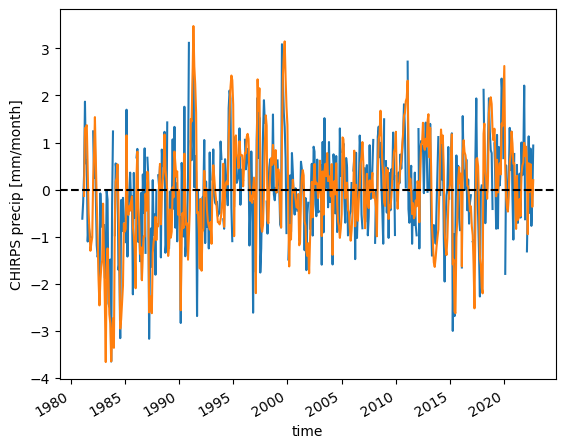

In [57]:
spi.plot()
spi4.plot()

# spi.sel(time = "2022").plot(marker = ".")
plt.axhline(0, color = "k", ls = "--")

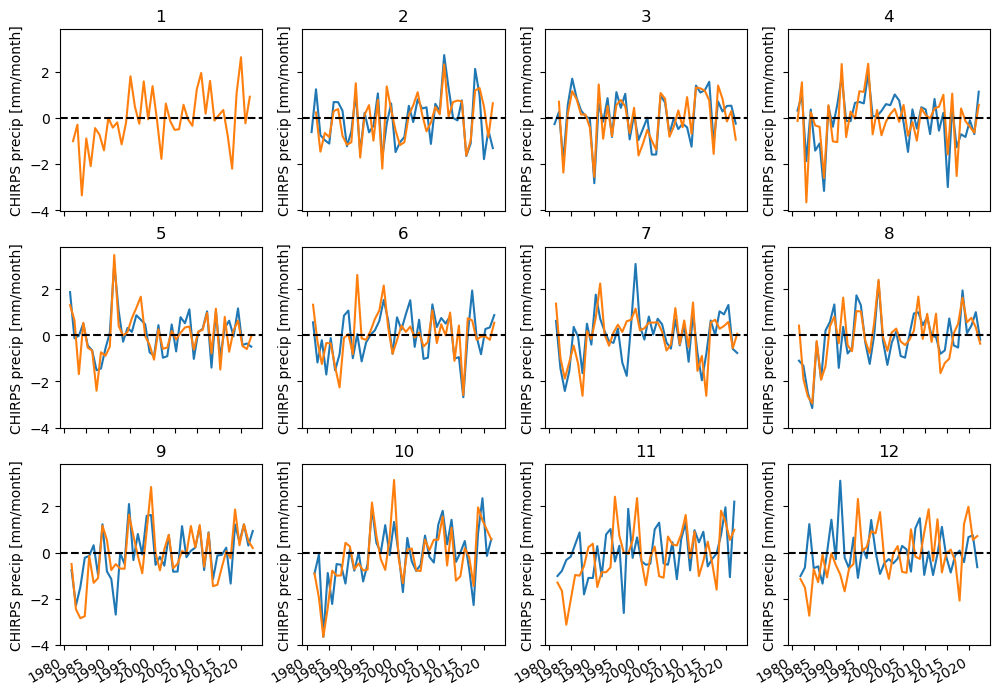

In [63]:
fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (12,8), sharex = True, sharey = True)

for i in range(12):
    
    ax = plt.gcf().axes[i]
    spi.groupby("time.month")[i+1].plot(ax = ax)
    spi4.groupby("time.month")[i+1].plot(ax = ax)

    ax.axhline(0, ls = "--", color = "k")
    
    ax.set_title(i+1)
    ax.set_xlabel("")

#### **Maps of SPI**

In [11]:
# consider 1-month precip, over river basin only
pr1 = pr.where(rm == 1).dropna("latitude", "all").dropna("longitude", "all")

spi = []
for i in range(12):
    
    pr_m = pr1.groupby("time.month")[i+1]
    
    pr_cal = pr_m.sel(time = slice("1985", "2015")).copy()
    pr_cal = pr_cal.where((pr_cal >= 1).sum("time") >= 30)    # only include cells where monthly precipitation > 1mm for at least 30 of the available years (removes arid regions)
    
    pars = fit(pr_cal.dropna("time", "all"), dist = "gamma", method = "PWM")     # use xclim to do the fitting: produces a map of the parameters. Use PWM as more robust & faster
    
    spi_m = xr.apply_ufunc(lambda pr, dparams : norm.ppf(gamma.cdf(pr, *dparams)), pr_m, pars, 
                                    input_core_dims = [["time"],["dparams"]], output_core_dims = [["time"]], vectorize = True).assign_coords(time = pr_m.time)
    
    spi.append(spi_m)

In [ ]:
zz = xr.concat(spi, "time").sortby("time").rename("spi")
zz.to_netcdf("spi1-basin.nc")

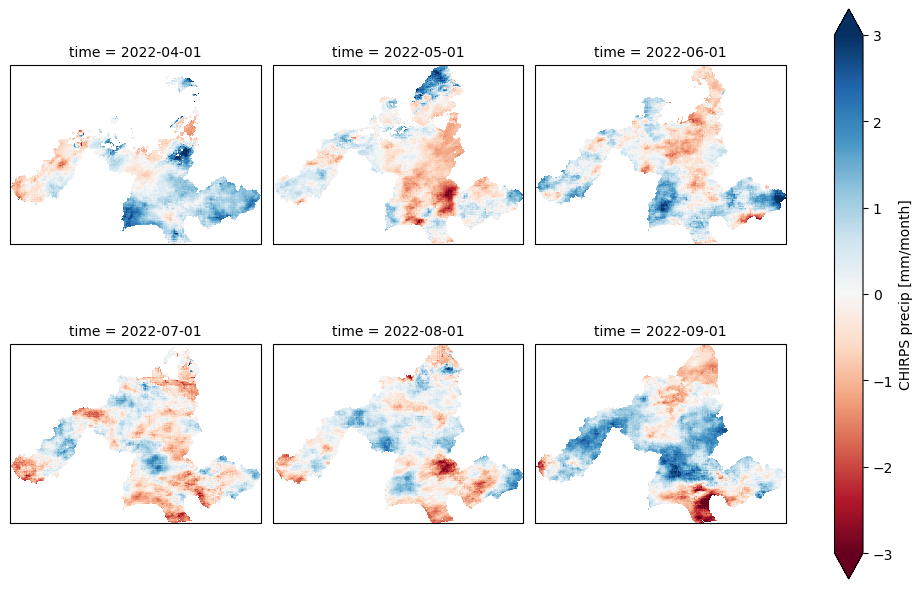

In [19]:
zz.sel(time = slice("2022-04", None)).plot(col = "time", col_wrap = 3, subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, cmap = "RdBu", vmax = 3, vmin = -3)

### **Relative anomalies**

In [1]:
# let's try something simpler. Relative monthly anomalies wrt 1985-2015 mean.
import sys; sys.path.append('/home/clair/WWA'); from wwa import *

ERROR 1: PROJ: proj_create_from_database: Open of /home/clair/miniconda3/envs/wwa/share/proj failed


In [11]:
# load monthly chirps data
pr = xr.open_dataset("chirps-nigeriaflooding-monthly.nc").precip.assign_attrs(long_name = "CHIRPS precip")
sf_flood = gpd.read_file("nigeria-flood-region")
rm = regionmask.mask_3D_geopandas(sf_flood, pr.longitude, pr.latitude, drop = False).squeeze(drop = True)
rm.to_netcdf("regionmask-basin3.nc")

In [11]:
# monthly climatology
pr_clim = pr.sel(time = slice("1985", "2015")).groupby("time.month").mean()

/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/pygeos/io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


In [4]:
pr_anom_abs = pr.groupby("time.month") - pr_clim

In [24]:
pr_anom_rel = pr_anom_abs.sel(time = slice("2022-04", None)).groupby("time.month") / pr_clim

/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/cartopy/mpl/style.py:76: Us

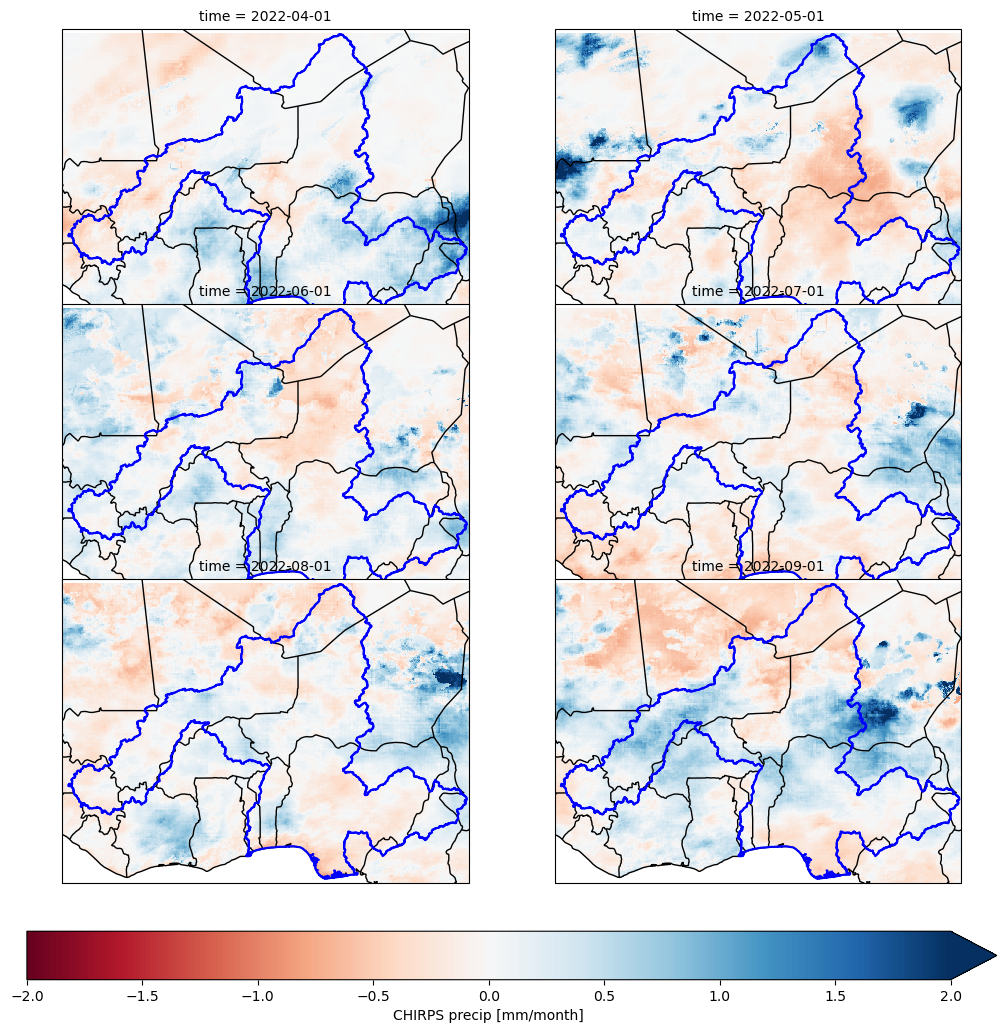

In [25]:
pr_anom_rel.plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, col = "time", cmap = "RdBu", col_wrap = 2, vmin = -2, vmax = 2,
                           cbar_kwargs = {"location" : "bottom", "fraction" : 0.07, "pad" : 0.05}, figsize = (10,10))

for ax in plt.gcf().axes[:-1]:
    
    sf_flood.boundary.plot(ax = ax, color = "blue")
    
    ax.add_feature(cartopy.feature.BORDERS, color = "k")
    # ax.add_feature(cartopy.feature.RIVERS, color = "blue", alpha = 0.5)
    
    ax.coastlines()
    ax.set_extent((-12,16,4,24))